In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
import tensorflow as tf

In [31]:
df = pd.read_csv("Churn_Modelling.csv")
df=df.drop(columns=["RowNumber","CustomerId","Surname"])
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
df.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False


In [33]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [35]:
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

In [37]:
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\sinan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7953 - loss: 0.5574 - val_accuracy: 0.7986 - val_loss: 0.4978
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4874 - val_accuracy: 0.7986 - val_loss: 0.4730
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4596 - val_accuracy: 0.8057 - val_loss: 0.4602
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8017 - loss: 0.4526 - val_accuracy: 0.8093 - val_loss: 0.4482
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4431 - val_accuracy: 0.8150 - val_loss: 0.4390
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - loss: 0.4460 - val_accuracy: 0.8143 - val_loss: 0.4326
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8188 - loss: 0.4159 - val_accuracy: 0.8171 - val_loss: 0.4308
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8082 - loss: 0.4327 - val_accuracy: 0.

In [47]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8512 - loss: 0.3444
Accuracy: 0.8487


In [49]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy:  0.8486666666666667
Precision:  0.7183098591549296
Recall:  0.4187192118226601
F1 Score:  0.529045643153527
[[2291  100]
 [ 354  255]]


In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 2291
False Positives (FP): 100
False Negatives (FN): 354
True Positives (TP): 255


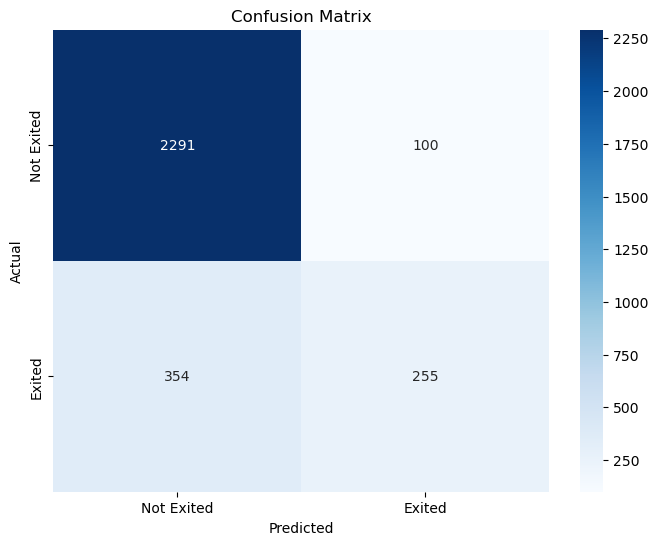

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

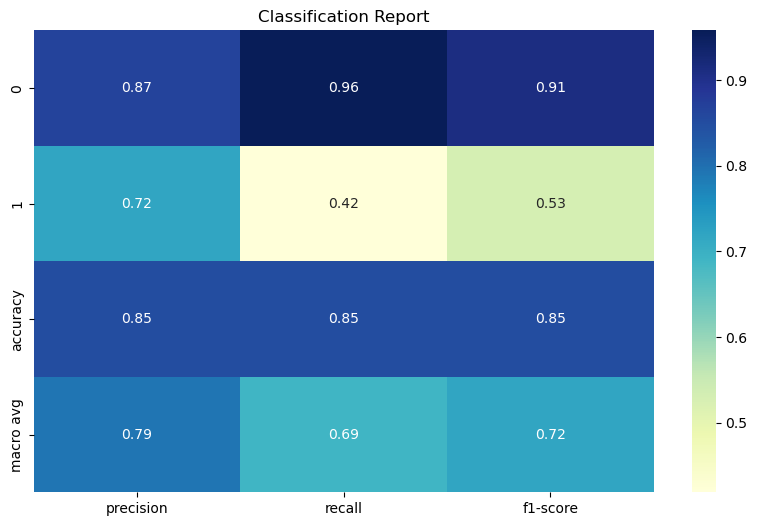

In [57]:
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report')
plt.show()

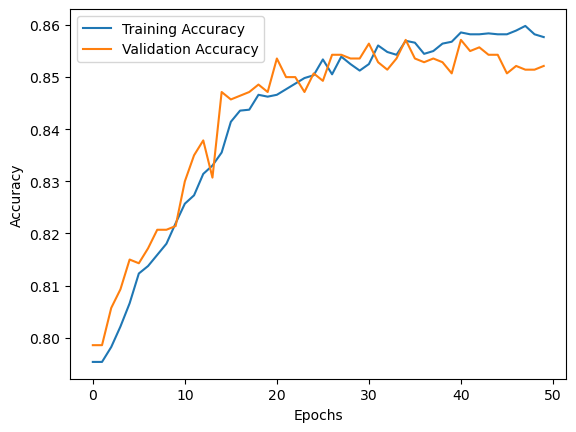

In [78]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

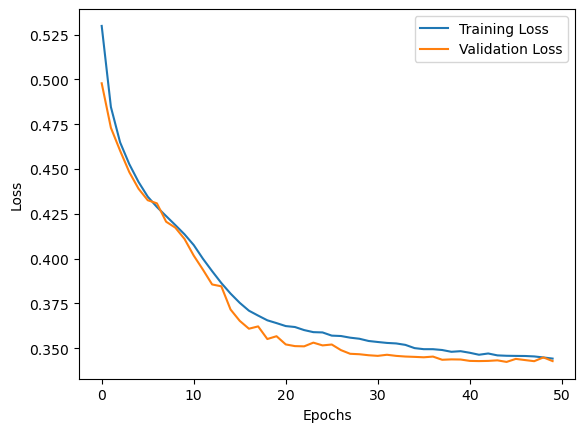

In [80]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


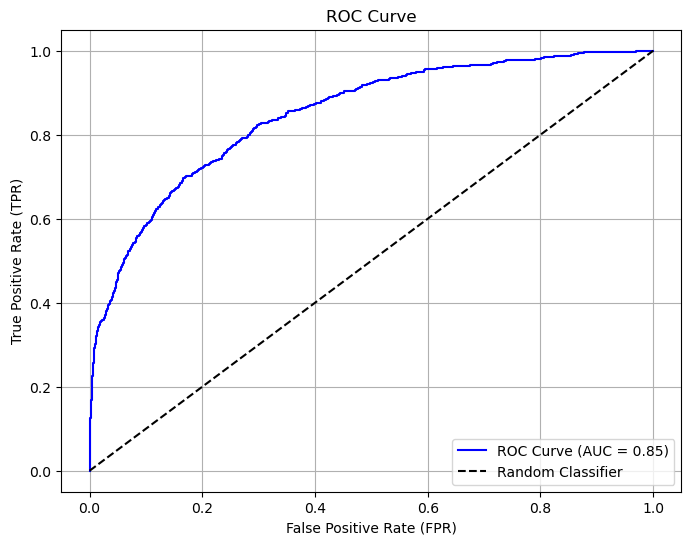

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Modelin olasılık tahminlerini al
y_prob = model.predict(X_test).ravel()  # Tek boyutlu hale getir

# ROC eğrisi metriklerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
